In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
election_results=pd.read_csv('./election_results.csv')

In [5]:
election_results.head()

,Unnamed: 0,Candidate_name,Party,State,District,Incumbent,Winner,Raised,Spent,percent_raised,percent_spent
0,0,Jerry Carl,R,Alabama,1,False,True,1971321,1859349,96.095624,95.925703
1,1,James Averhart,D,Alabama,1,False,False,80095,78973,3.904376,4.074297
2,0,Barry Moore,R,Alabama,2,False,True,650807,669368,92.070532,92.281307
3,1,Phyllis Harvey,D,Alabama,2,False,False,56050,55988,7.929468,7.718693
4,0,Mike D Rogers,R,Alabama,3,True,True,1193111,1218564,95.956760,96.747133


In [6]:
election_results.replace({False: 0, True: 1}, inplace=True)

In [7]:
election_results.head()

,Unnamed: 0,Candidate_name,Party,State,District,Incumbent,Winner,Raised,Spent,percent_raised,percent_spent
0,0,Jerry Carl,R,Alabama,1,0,1,1971321,1859349,96.095624,95.925703
1,1,James Averhart,D,Alabama,1,0,0,80095,78973,3.904376,4.074297
2,0,Barry Moore,R,Alabama,2,0,1,650807,669368,92.070532,92.281307
3,1,Phyllis Harvey,D,Alabama,2,0,0,56050,55988,7.929468,7.718693
4,0,Mike D Rogers,R,Alabama,3,1,1,1193111,1218564,95.956760,96.747133


Text(0.5, 1.0, 'Probability of Winning given the change in Funds Raised (%)')

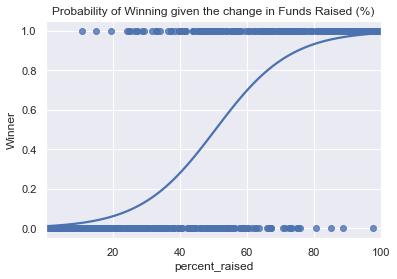

In [8]:
#fit a logistic regression to visualise how the probability of winning changes with changes in the %of funds raised
sns.set_theme(color_codes=True)
sns.regplot(x='percent_raised', y='Winner',
            data=election_results,
            logistic=True,
            ci=None);
plt.title('Probability of Winning given the change in Funds Raised (%)')

In [9]:
election_results.describe()

,Unnamed: 0,District,Incumbent,Winner,Raised,Spent,percent_raised,percent_spent
count,894.000000,894.00000,894.000000,894.000000,8.940000e+02,8.940000e+02,894.000000,894.000000
mean,0.644295,10.12528,0.431767,0.482103,1.865604e+06,1.684187e+06,48.657718,48.657718
std,0.798154,10.44379,0.495600,0.499959,3.025961e+06,2.625248e+06,38.202640,37.598903
min,0.000000,1.00000,0.000000,0.000000,4.700000e+01,0.000000e+00,0.001415,0.000000
25%,0.000000,3.00000,0.000000,0.000000,1.288542e+05,1.109045e+05,6.920725,7.570935
50%,1.000000,6.00000,0.000000,0.000000,1.085950e+06,9.449390e+05,48.235941,47.676096
75%,1.000000,13.00000,1.000000,1.000000,2.261850e+06,2.028943e+06,89.720358,89.272530
max,7.000000,53.00000,1.000000,1.000000,3.726283e+07,3.283061e+07,100.000000,100.000000


In [10]:
#Fitting a logistic regression model
base_logreg = (sm.GLM(endog = election_results['Winner'],
                 exog = sm.add_constant(election_results[[]]),
                 family=sm.families.Binomial())
                 .fit()
                 )

C:\Users\U6033919\Anaconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
base_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      893
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -619.10
Date:                Wed, 20 Oct 2021   Deviance:                       1238.2
Time:                        09:49:48   Pearson chi2:                     894.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0716      0.067     -1.070      0.285      -0.203       0.060
==============================================================================
"""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='percent_raised', ylabel='Winner'>

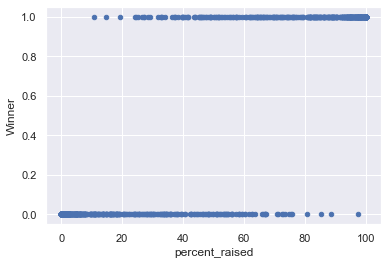

In [20]:
election_results.plot(kind='scatter', x= 'percent_raised', y='Winner')


In [21]:
funds_raised_logreg = (sm.GLM(endog = election_results['Winner'],
                 exog = sm.add_constant(election_results[['percent_raised']]),
                 family=sm.families.Binomial())
                 .fit()
                 )

C:\Users\U6033919\Anaconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
funds_raised_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -206.37
Date:                Wed, 20 Oct 2021   Deviance:                       412.75
Time:                        10:02:22   Pearson chi2:                     580.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5028      0.314    -14.354      0.000      -5.118      -3.888
percent_raised     0.0890      0.006     15.651      0.000       0.078       0.100
==================================================================================
"""

In [24]:
import numpy as np

In [25]:
print(np.exp(base_logreg.params))

const    0.930886
dtype: float64


In [26]:
print(np.exp(funds_raised_logreg.params))

const             0.011078
percent_raised    1.093069
dtype: float64


In [31]:
x=np.linspace(start=election_results['percent_raised'].min(),
            stop = election_results['percent_raised'].max(),
            num = 200)
np.exp(funds_raised_logreg.params['const'] + funds_raised_logreg.params['percent_raised']*x)[:5]

array([0.01107942, 0.01158611, 0.01211597, 0.01267006, 0.0132495 ])

In [32]:
funds_raised_logreg.predict(sm.add_constant(x))[:5]

array([0.01095801, 0.01145341, 0.01197093, 0.01251154, 0.01307624])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


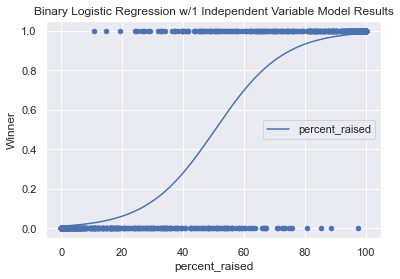

In [40]:
election_results.plot(kind='scatter', x= 'percent_raised', y='Winner')
y=funds_raised_logreg.predict(sm.add_constant(x))
plt.plot(x,y, label = "percent_raised")
plt.legend();
plt.title('Binary Logistic Regression w/1 Independent Variable Model Results');



In [41]:
spent_logreg = (sm.GLM(endog = election_results['Winner'],
                 exog = sm.add_constant(election_results[['percent_spent']]),
                 family=sm.families.Binomial())
                 .fit()
                 )

C:\Users\U6033919\Anaconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.48
Date:                Wed, 20 Oct 2021   Deviance:                       434.95
Time:                        10:36:22   Pearson chi2:                     615.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4779      0.310    -14.436      0.000      -5.086      -3.870
percent_spent     0.0886      0.006     15.667      0.000       0.078       0.100
=================================================================================
"""

In [46]:
x_spent=np.linspace(start=election_results['percent_spent'].min(),
            stop = election_results['percent_spent'].max(),
            num = 200)


In [48]:
np.exp(spent_logreg.params['const'] + spent_logreg.params['percent_spent']*x_spent)[:5]

array([0.01135672, 0.01187377, 0.01241436, 0.01297955, 0.01357048])

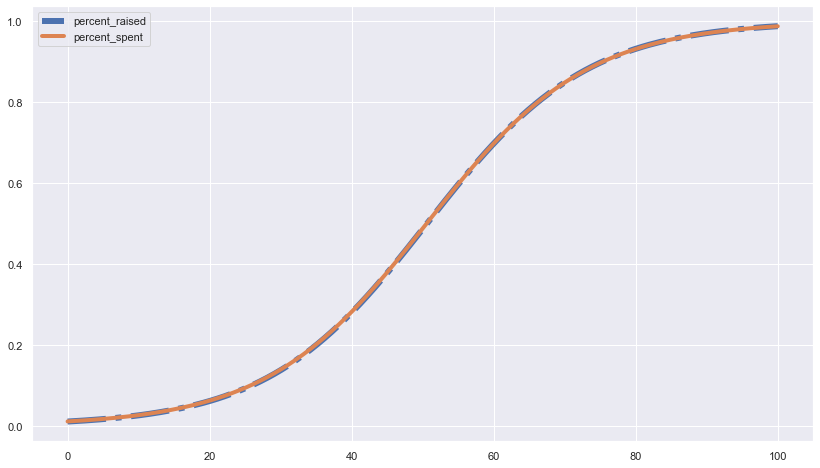

In [51]:
y=funds_raised_logreg.predict(sm.add_constant(x))
y_spent=spent_logreg.predict(sm.add_constant(x_spent))
plt.figure(figsize=(14,8))
plt.plot(x,y, label = "percent_raised", linewidth=6.0, linestyle='-.')
plt.plot(x_spent,y_spent, label = "percent_spent", linewidth=4.0)
plt.legend();

In [52]:
from scipy.stats import binom

In [ ]:
#prob of winning given the amount raised:

In [58]:
#n=len(election_results['Winner'])

In [59]:
p=np.exp(funds_raised_logreg.params)[1]/(1+np.exp(funds_raised_logreg.params)[1])

In [69]:
n=10

In [70]:
k=6

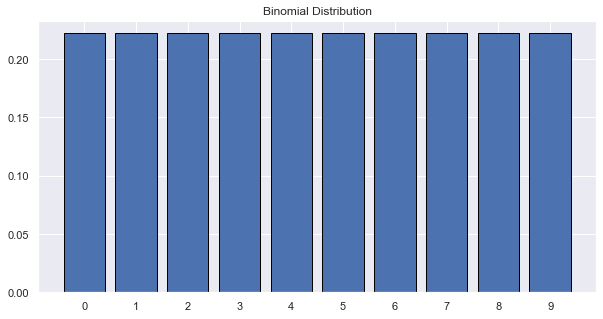

In [71]:
x = np.arange(start = 0, stop = 10, step = 1)
y = binom.pmf(k, n, p)

plt.figure(figsize = (10,5))
plt.bar(x, y, edgecolor = 'black')
plt.xticks(range(10))

plt.title('Binomial Distribution');